<a href="https://colab.research.google.com/github/amitbisht99/Amazon_Sales_Analysis/blob/main/Amazon_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('/content/Amazon Sales data.csv')

In [3]:
df.sample()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
88,Middle East and North Africa,Kuwait,Fruits,Online,M,4/30/2012,513417565,5/18/2012,522,9.33,6.92,4870.26,3612.24,1258.02


In [4]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
df.shape

(100, 14)

In [6]:
df.size

1400

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [9]:
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [10]:
df.dtypes

,0
Region,object
Country,object
Item Type,object
Sales Channel,object
Order Priority,object
Order Date,object
Order ID,int64
Ship Date,object
Units Sold,int64
Unit Price,float64


In [11]:
df = df.astype ({'Ship Date': 'datetime64[ns]', 'Order Date': 'datetime64[ns]'})
df.dtypes

,0
Region,object
Country,object
Item Type,object
Sales Channel,object
Order Priority,object
Order Date,datetime64[ns]
Order ID,int64
Ship Date,datetime64[ns]
Units Sold,int64
Unit Price,float64


<Axes: >

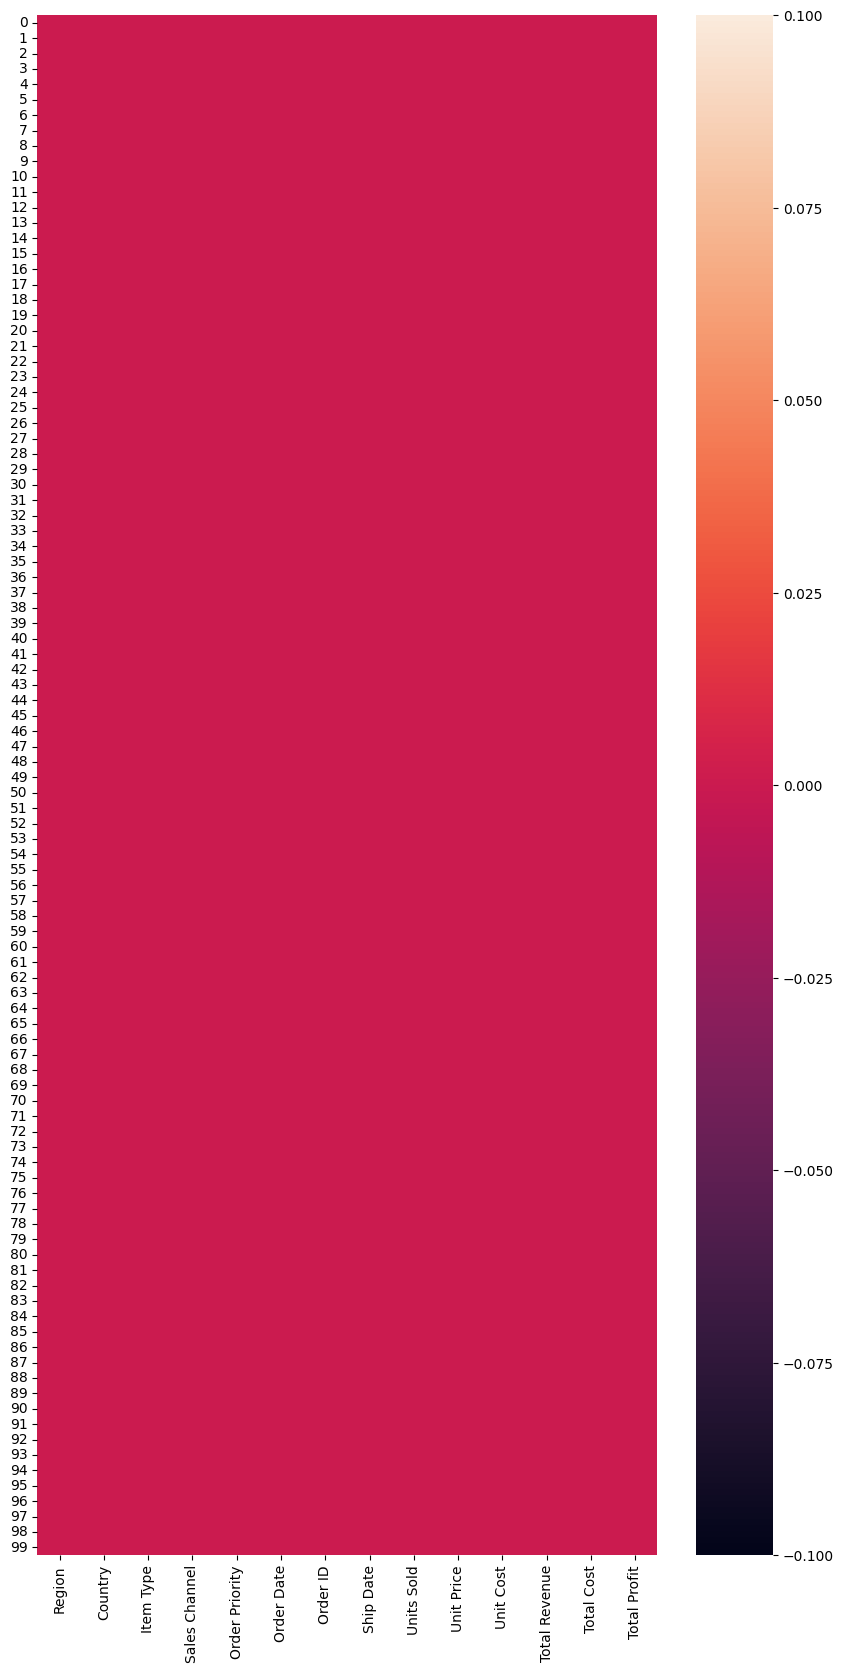

In [12]:
plt.figure (figsize = (10, 20))
sns.heatmap (df.isnull())

## **1. Which region has the highest total sales revenue?**

In [13]:
HTR = df.groupby (df['Region']) ['Total Revenue'].sum()
HTR.idxmax()

'Sub-Saharan Africa'

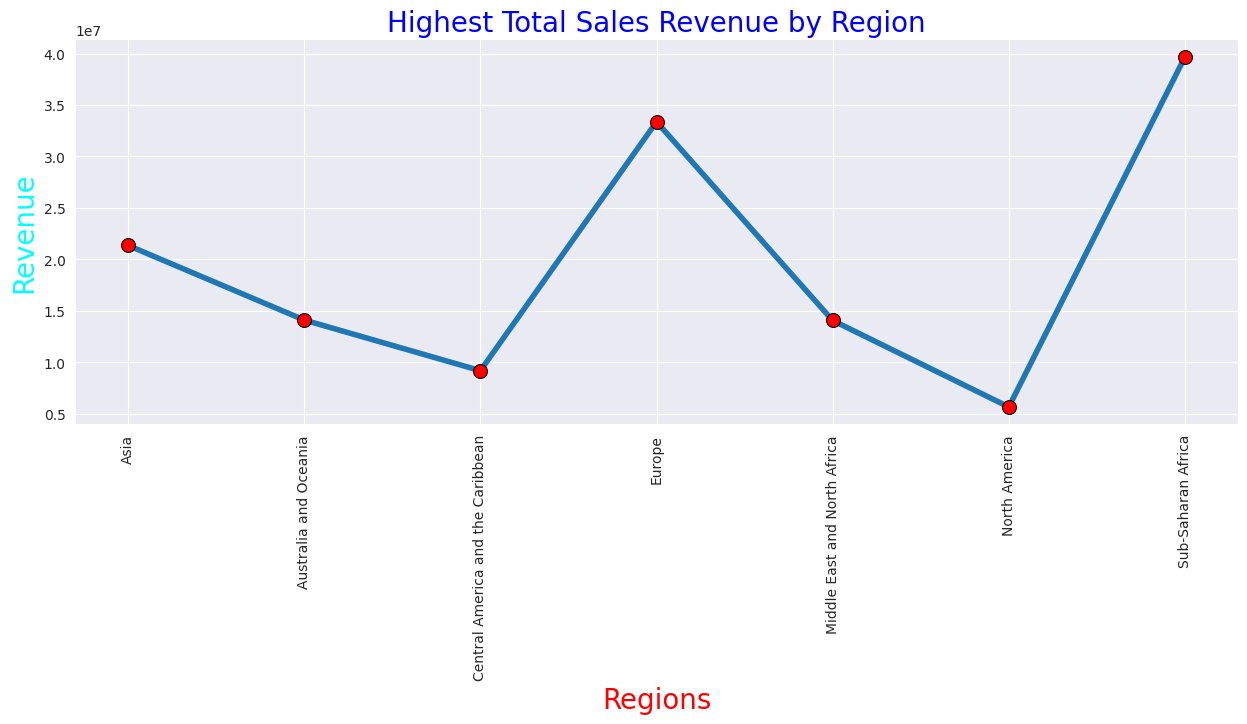

In [14]:
# Grouping data and summing 'Total Revenue' by 'Region'
group_data = df.groupby('Region')['Total Revenue'].sum().reset_index()

# Setting Seaborn style
sns.set_style('darkgrid')

# Creating the plot
plt.figure(figsize=(15, 5))
sns.lineplot(
    x='Region',
    y='Total Revenue',
    data=group_data,
    linestyle='-',  # Use a valid linestyle
    linewidth=4,
    marker='o',
    markersize=10,
    markerfacecolor='red',
    markeredgecolor='black'
)

# Setting plot labels, title, and styling
plt.xticks(rotation=90)
plt.title('Highest Total Sales Revenue by Region', fontsize=20, color='blue')
plt.xlabel('Regions', fontsize=20, color='red')
plt.ylabel('Revenue', fontsize=20, color='cyan')

# Displaying the plot
plt.show()


## **2, What is the average unit price & unit cost for each item type?**

In [15]:
# Calculating the average unit price and unit cost for each item type
avg_unit_price = df.groupby('Item Type')['Unit Price'].mean()
avg_unit_cost = df.groupby('Item Type')['Unit Cost'].mean()

# Combining the results into a single DataFrame
avg_price_cost = pd.DataFrame({
    'Average Unit Price': avg_unit_price,
    'Average Unit Cost': avg_unit_cost
})

# Resetting the index (optional)
avg_price_cost.reset_index(inplace=True)

# Displaying the DataFrame
avg_price_cost


,Item Type,Average Unit Price,Average Unit Cost
0,Baby Food,255.28,159.42
1,Beverages,47.45,31.79
2,Cereal,205.70,117.11
3,Clothes,109.28,35.84
4,Cosmetics,437.20,263.33
5,Fruits,9.33,6.92
6,Household,668.27,502.54
7,Meat,421.89,364.69
8,Office Supplies,651.21,524.96
9,Personal Care,81.73,56.67


## **3. Which country has the highest total profit?**

In [16]:
# Grouping and summing Total Profit by Country
total_profit = df.groupby(['Country'])['Total Profit'].sum()

# Finding the country with the highest total profit
highest_total_profit = total_profit.idxmax()

# Corrected print statement
print (f"The Country with the highest Total Profit is {highest_total_profit}")

The Country with the highest Total Profit is Djibouti


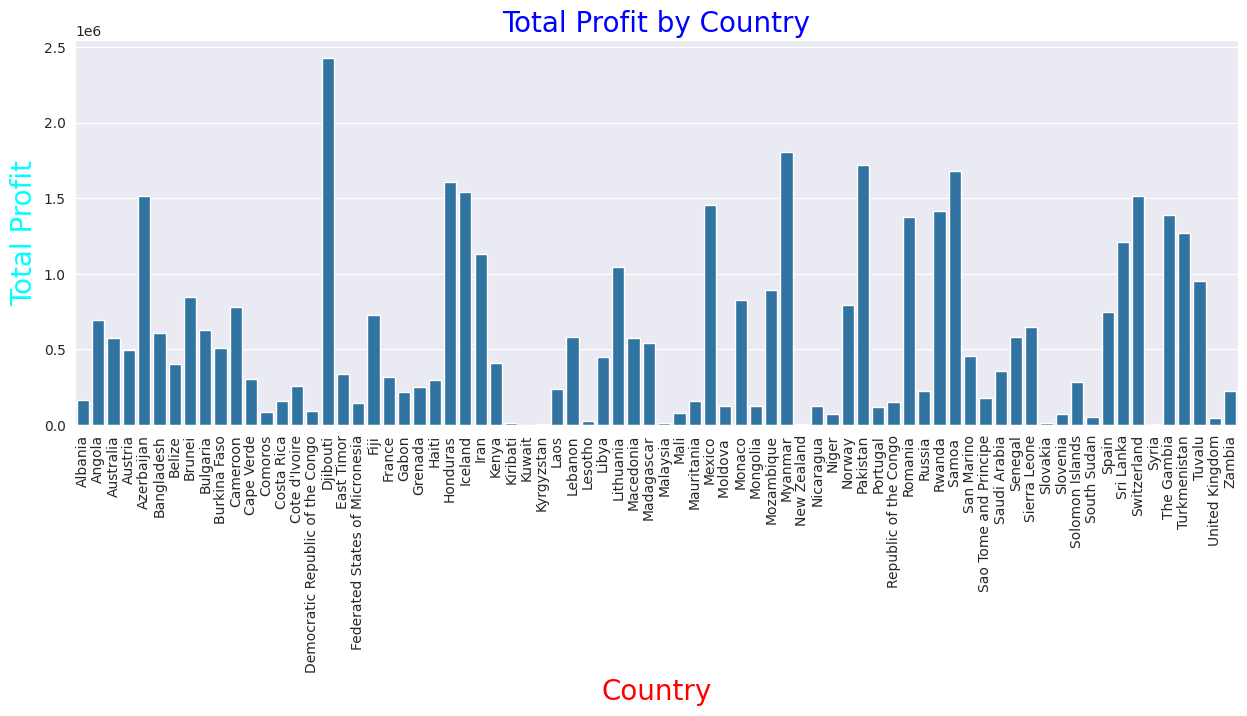

In [17]:
# Grouping data and summing 'Total Profit' by 'Country'
group_data = df.groupby('Country')['Total Profit'].sum().reset_index()

# Setting Seaborn style
sns.set_style('darkgrid')

# Creating the plot
plt.figure(figsize=(15, 5))
sns.barplot(
    x='Country',
    y='Total Profit',
    data=group_data  # Pass the grouped data to the plot
)

# Setting plot labels, title, and styling
plt.xticks(rotation=90)
plt.title('Total Profit by Country', fontsize=20, color='blue')
plt.xlabel('Country', fontsize=20, color='red')
plt.ylabel('Total Profit', fontsize=20, color='cyan')

# Displaying the plot
plt.show()

## **4. How does the sales channel affect the order priority distribution ?**

In [18]:
sales_channel = df.groupby(['Sales Channel']) ['Order Priority'].value_counts().reset_index()
sales = pd.DataFrame (sales_channel)
sales

,Sales Channel,Order Priority,count
0,Offline,H,17
1,Offline,C,13
2,Offline,L,12
3,Offline,M,8
4,Online,L,15
5,Online,H,13
6,Online,M,13
7,Online,C,9


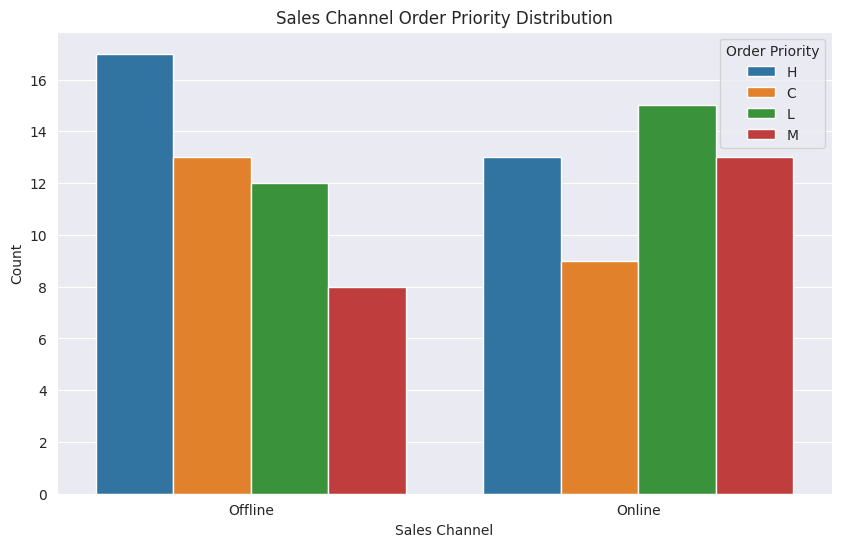

In [19]:
sales.reset_index()

sns.set_style ('darkgrid')

plt.figure (figsize = (10, 6))
sns.barplot (
    x = 'Sales Channel',
    y = 'count',
    hue = 'Order Priority',
    data = sales
)

plt.xlabel ('Sales Channel')
plt.ylabel ('Count')
plt.title ('Sales Channel Order Priority Distribution')

plt.show()

## **5. What is the average order processing time for each sales channel?**
  ### *Order Processing Time: duration b/w order & ship dates

In [20]:
df['Processing Time'] = df['Ship Date'] - df ['Order Date']

apt = df.groupby (['Sales Channel']) ['Processing Time'].mean().reset_index()
apt

,Sales Channel,Processing Time
0,Offline,23 days 04:48:00
1,Online,23 days 12:28:48


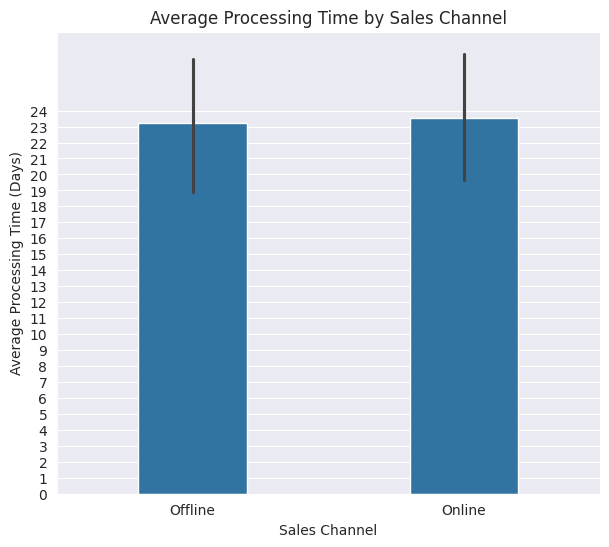

In [21]:
# Creating the bar plot
plt.figure (figsize = (7, 6))
sns.barplot (data = df,
             x = df ['Sales Channel'],
             y = df ['Processing Time'].dt.days,
             width = 0.4)

# Adding labels, title, and ticks
plt.title ('Average Processing Time by Sales Channel')
plt.xlabel ('Sales Channel')
plt.yticks (np.arange (0, 25, 1))
plt.ylabel ('Average Processing Time (Days)')

# Display the plot
plt.show()

## **6. Which item types have the highest & lowest total sales?**

In [22]:
# Grouping by 'Item Type' and summing 'Total Revenue'
item_type = df.groupby(['Item Type'])['Total Revenue'].sum().reset_index()

# Finding the highest and lowest sales revenue item types
highest_sales_revenue_item_type = item_type.loc[item_type['Total Revenue'].idxmax(), 'Item Type']
lowest_sales_revenue_item_type = item_type.loc[item_type['Total Revenue'].idxmin(), 'Item Type']

# Printing the results
print(f"Highest Sales Revenue by Item Type: {highest_sales_revenue_item_type}")
print(f"Lowest Sales Revenue by Item Type: {lowest_sales_revenue_item_type}")

Highest Sales Revenue by Item Type: Cosmetics
Lowest Sales Revenue by Item Type: Fruits


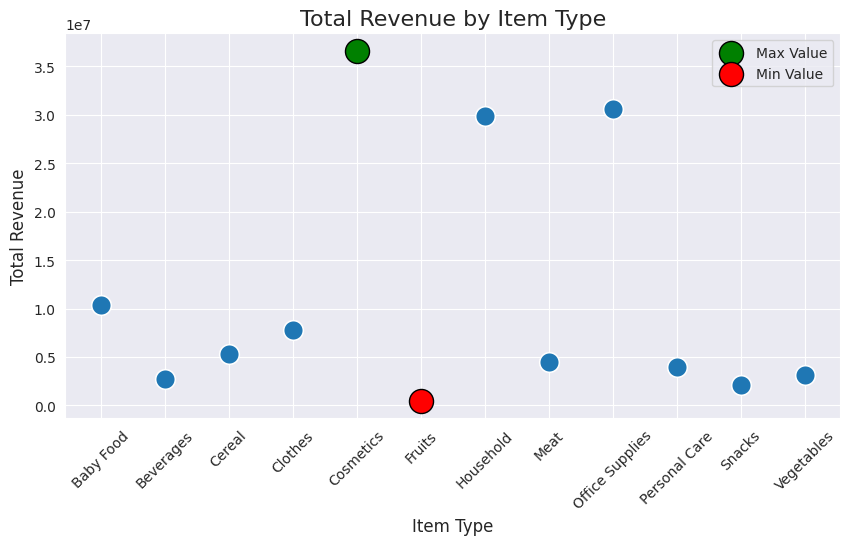

In [23]:
# Plotting a scatter plot for Total Revenue by Item Type
plt.figure(figsize=(10, 5))

# Scatter plot using Seaborn
sns.scatterplot(
    data=item_type,
    x='Item Type',
    y='Total Revenue',
    s=200
)

# Highlighting the Max Value
max_index = item_type['Total Revenue'].idxmax()
plt.scatter(
    x=item_type.loc[max_index, 'Item Type'],
    y=item_type.loc[max_index, 'Total Revenue'],
    s=300,
    color='Green',
    edgecolor='Black',
    label='Max Value'
)

# Highlighting the Min Value
min_index = item_type['Total Revenue'].idxmin()
plt.scatter(
    x=item_type.loc[min_index, 'Item Type'],
    y=item_type.loc[min_index, 'Total Revenue'],
    s=300,
    color='Red',
    edgecolor='Black',
    label='Min Value'
)

# Adding labels and title
plt.title('Total Revenue by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.show()

## **7. How does the order priority vary across different regions?**

In [24]:
diff_region_by_order_priority = df.groupby (['Region']) ['Order Priority'].value_counts()
diff_region_by_order_priority

Region                             Order Priority
Asia                               L                  4
                                   H                  3
                                   C                  2
                                   M                  2
Australia and Oceania              H                  5
                                   C                  4
                                   L                  1
                                   M                  1
Central America and the Caribbean  C                  2
                                   H                  2
                                   L                  2
                                   M                  1
Europe                             H                  7
                                   L                  6
                                   C                  5
                                   M                  4
Middle East and North Africa       L                  4
                                   M                  4
                                   H                  2
North America                      C                  1
                                   L                  1
                                   M                  1
Sub-Saharan Africa                 H                 11
                                   L                  9
                                   C                  8
                                   M                  8
Name: count, dtype: int64

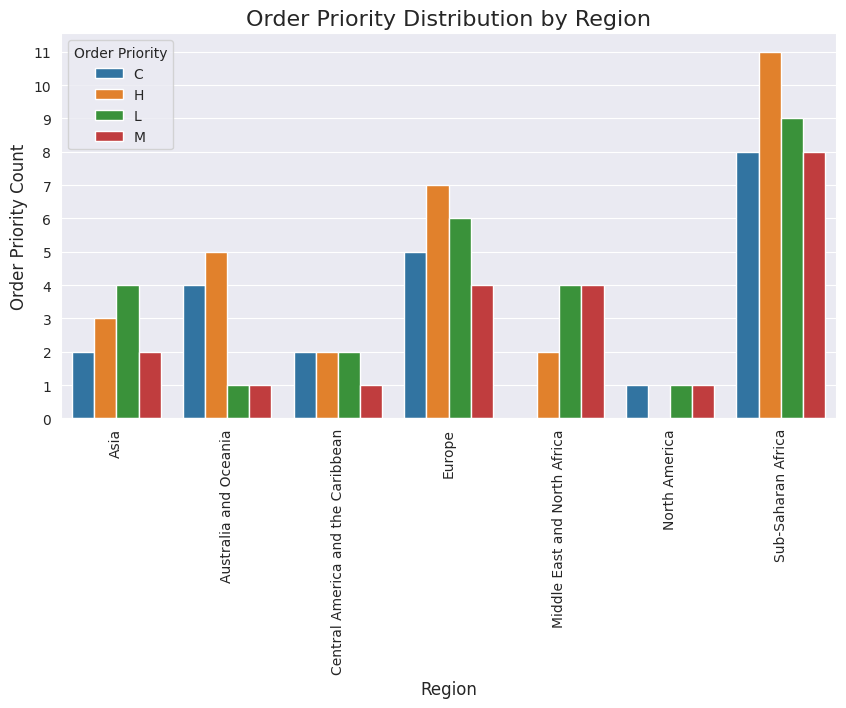

In [25]:
# Grouping data and counting occurrences of Order Priority by Region
Diff_regions_by_order_priority = (
    df.groupby(['Region', 'Order Priority'])
    .size()
    .reset_index(name='Order Priority Count')
)

# Setting up the plot
plt.figure(figsize=(10, 5))

sns.barplot(
    data=Diff_regions_by_order_priority,
    x='Region',
    y='Order Priority Count',
    hue='Order Priority'
)

# Enhancing the visualization
plt.xticks(rotation=90)
plt.yticks(
    np.arange(
        0,
        Diff_regions_by_order_priority['Order Priority Count'].max() + 1,
        1
    )
)
plt.title('Order Priority Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Order Priority Count', fontsize=12)

# Display the plot
plt.show()

## **8. What is the correlation between Unit Price & Total Profit?**

In [26]:
cor = df['Unit Price'].corr (df['Total Profit'])

print (f"Correlation between Unit Price & Total Profit: {cor: .2f}")

Correlation between Unit Price & Total Profit:  0.56


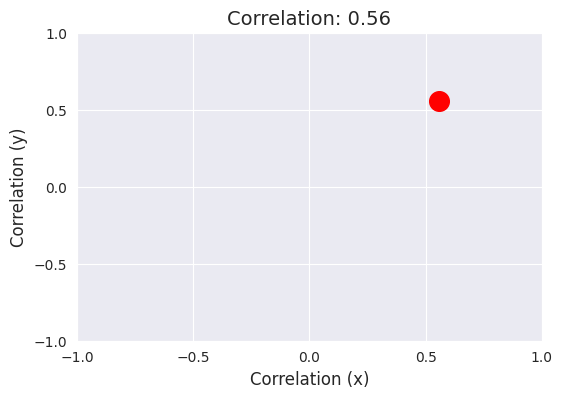

In [27]:
# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(
    x=cor,
    y=cor,
    s=200,
    color='red'
)

# Adjusting axis ticks and limits
plt.xticks(np.arange(-1, 1.5, 0.5))
plt.yticks(np.arange(-1, 1.5, 0.5))
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Adding title and axis labels
plt.title(f'Correlation: {cor:.2f}', fontsize=14)
plt.xlabel('Correlation (x)', fontsize=12)
plt.ylabel('Correlation (y)', fontsize=12)

# Display the plot
plt.show()

## **9. Are there any seasonal trends or patterns in the sales data?**

In [28]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Grouping data by month and summing 'Total Revenue'
monthly_sales = df.groupby(df['Order Date'].dt.month)['Total Revenue'].sum().reset_index()

# Mapping month numbers to month names
month = {
    1: 'JAN',
    2: 'FEB',
    3: 'MAR',
    4: 'APR',
    5: 'MAY',
    6: 'JUN',
    7: 'JUL',
    8: 'AUG',
    9: 'SEPT',
    10: 'OCT',
    11: 'NOV',
    12: 'DEC'
}
monthly_sales['Month'] = monthly_sales['Order Date'].map(month)

# Selecting only Month and Revenue
monthly_sales = monthly_sales[['Month', 'Total Revenue']]

# Display the result
monthly_sales

,Month,Total Revenue
0,JAN,10482467.12
1,FEB,24740517.77
2,MAR,2274823.87
3,APR,16187186.33
4,MAY,13215739.99
5,JUN,5230325.77
6,JUL,15669518.50
7,AUG,1128164.91
8,SEPT,5314762.56
9,OCT,15287576.61


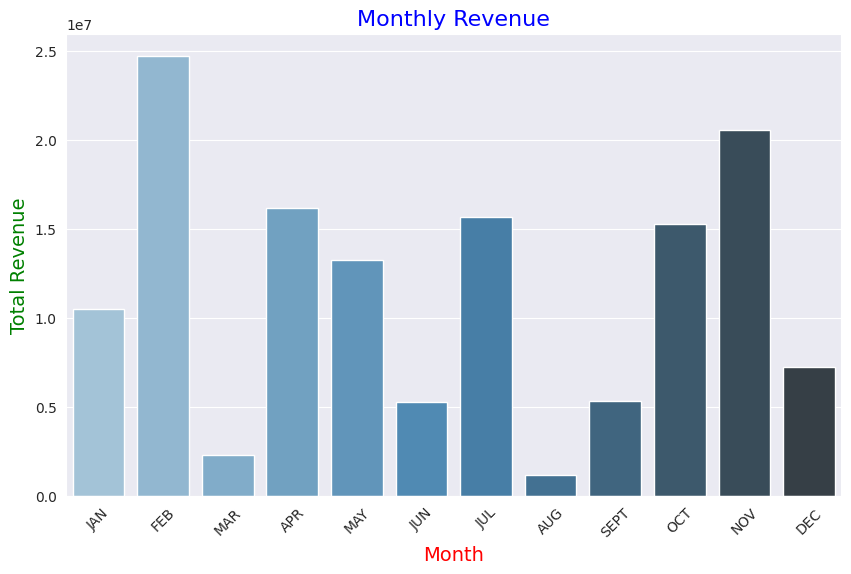

In [29]:
# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='Month', y='Total Revenue', hue='Month',
            palette='Blues_d', dodge=False, legend=False)

# Adding labels and title
plt.title('Monthly Revenue', fontsize=16, color='blue')
plt.xlabel('Month', fontsize=14, color='red')
plt.ylabel('Total Revenue', fontsize=14, color='green')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## **10. How does the number if units sold across different countries?**

In [30]:
countries = df.groupby (df ['Country']) ['Units Sold'].sum().reset_index(name = 'Units Sold')

pd.set_option ('display.max_rows', None)

countries

,Country,Units Sold
0,Albania,2269
1,Angola,4187
2,Australia,12995
3,Austria,2847
4,Azerbaijan,9255
5,Bangladesh,8263
6,Belize,5498
7,Brunei,6708
8,Bulgaria,5660
9,Burkina Faso,8082


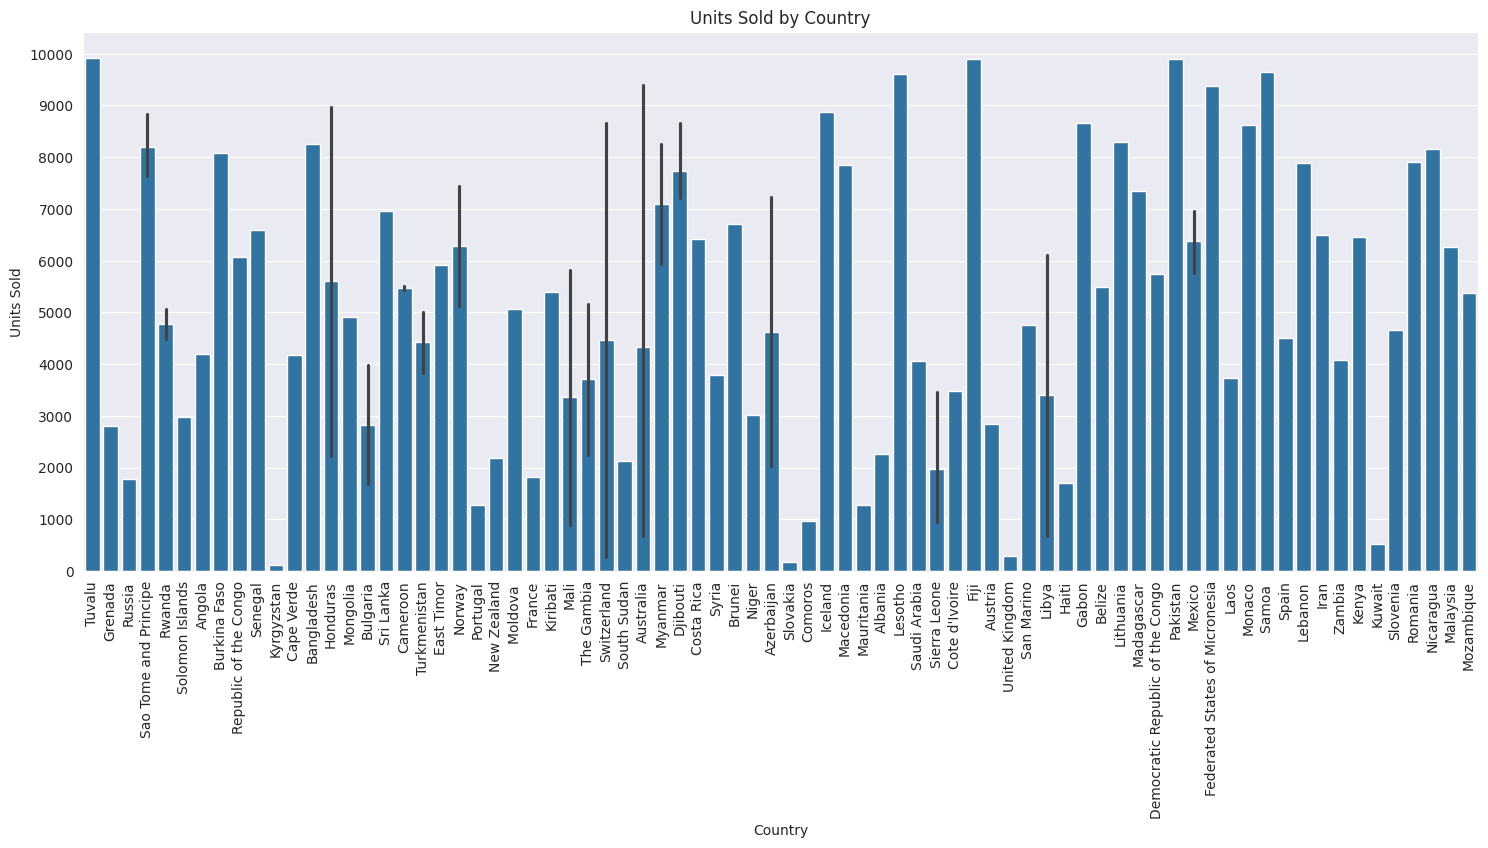

In [31]:
# @title Units Sold
plt.figure(figsize=(18, 7))

# If 'df' is the correct DataFrame name, and 'countries' contains the aggregated sales per country
sns.barplot(data=df, x='Country', y='Units Sold')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Set y-axis tick marks based on the range of 'Unit Sold'
plt.yticks(np.arange(0, df['Units Sold'].max() + 1000, 1000))

# Add titles and axis labels
plt.title("Units Sold by Country")
plt.xlabel("Country")
plt.ylabel("Units Sold")

plt.show()

## **11. How does the total sales revenue vary across different countries?**

In [32]:
sales_revenue = df.groupby (['Country']) ['Total Revenue'].sum().reset_index(name = 'Total Revenue')
sales_revenue

,Country,Total Revenue
0,Albania,247956.32
1,Angola,2798046.49
2,Australia,2489933.49
3,Austria,1244708.40
4,Azerbaijan,4478800.21
5,Bangladesh,902980.64
6,Belize,600821.44
7,Brunei,4368316.68
8,Bulgaria,2779199.71
9,Burkina Faso,1245112.92


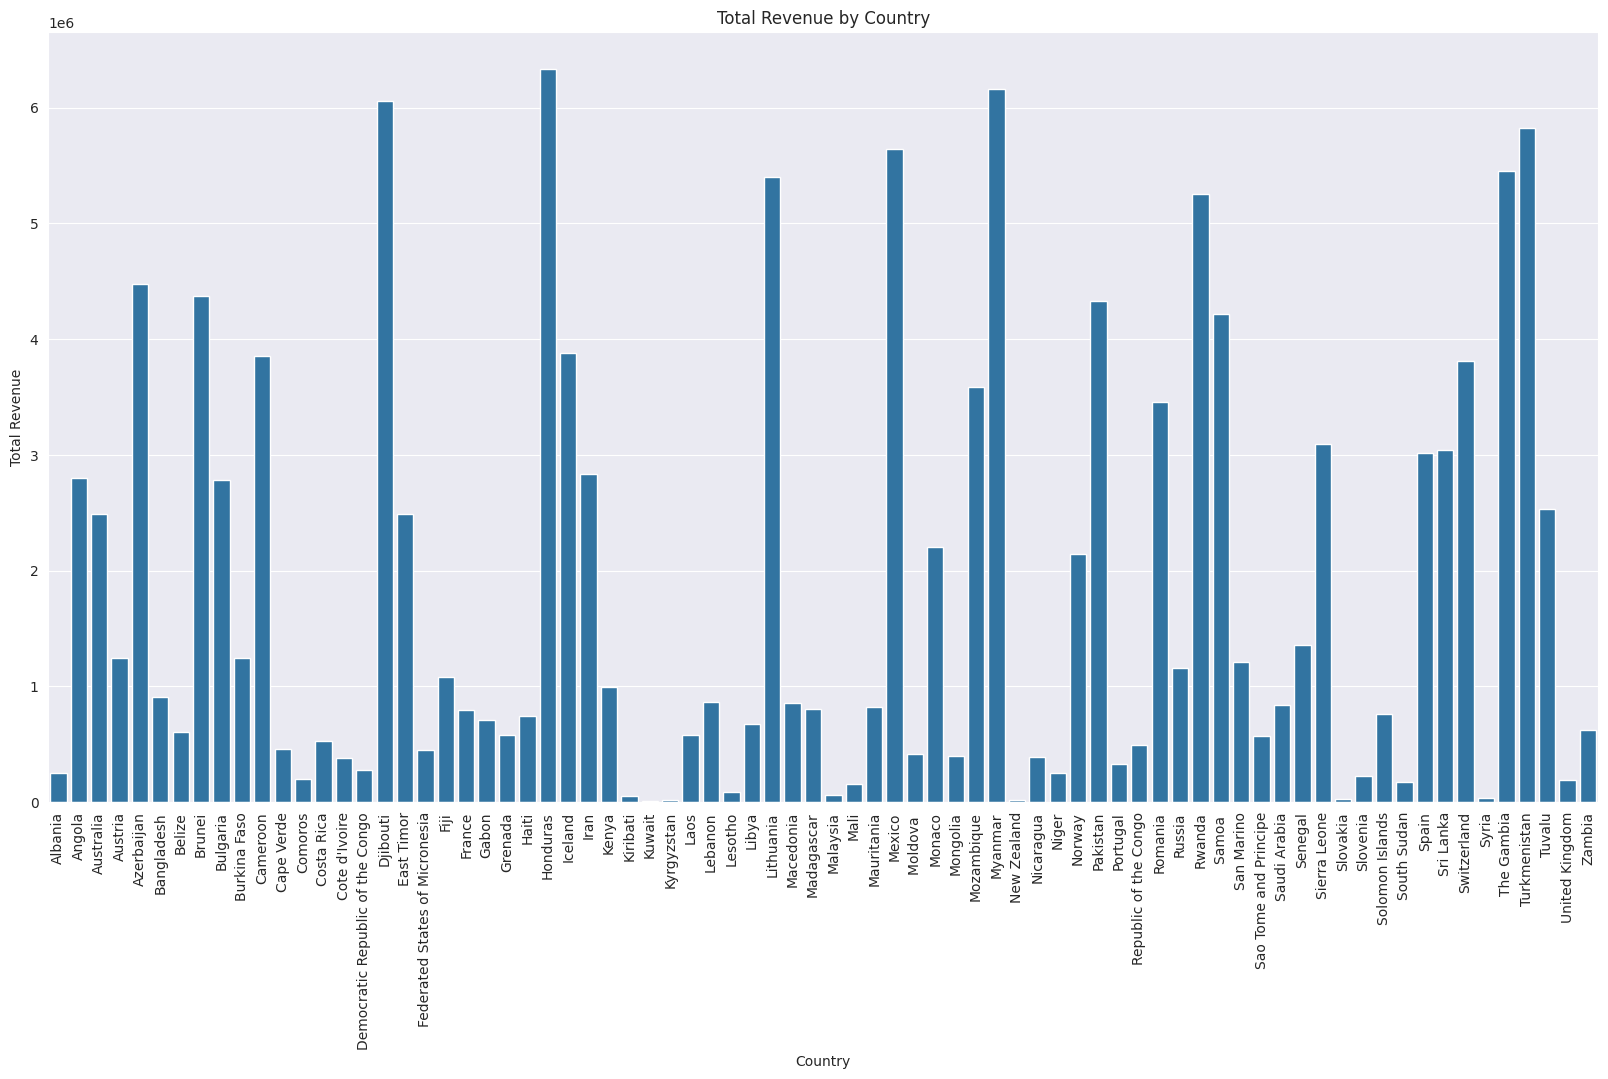

In [33]:
# @title Total Revenue
plt.figure(figsize=(20, 10))

# Plotting the total revenue per country
sns.barplot(x=sales_revenue['Country'], y=sales_revenue['Total Revenue'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding title and axis labels
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')

# Show the plot
plt.show()

## **12. What is the distribution of Unit Prices for each item type?**

In [34]:
item_unit = df.groupby (df ['Item Type']) ['Unit Price'].sum().reset_index (name = 'Unit Price')
item_unit

,Item Type,Unit Price
0,Baby Food,1786.96
1,Beverages,379.60
2,Cereal,1439.90
3,Clothes,1420.64
4,Cosmetics,5683.60
5,Fruits,93.30
6,Household,6014.43
7,Meat,843.78
8,Office Supplies,7814.52
9,Personal Care,817.30


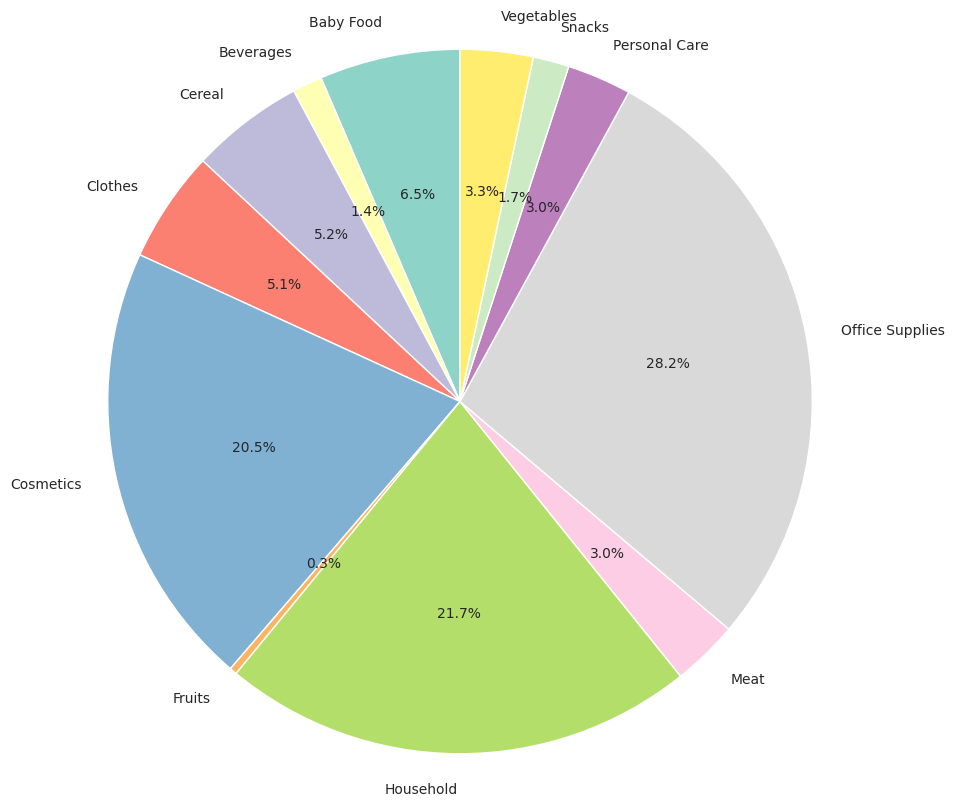

In [35]:
# @title Unit Price
plt.figure(figsize=(10, 10))  # Optional: Adjust the figure size for better readability

# Pie chart for 'Unit Price' distribution, with 'Item Type' as labels
plt.pie(x=item_unit['Unit Price'],
        labels=item_unit['Item Type'],
        autopct='%1.1f%%',  # Display percentage of each slice
        startangle=90,      # Start the pie chart at 90 degrees
        colors=sns.color_palette('Set3', len(item_unit)))  # Optional: Color palette for clarity

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title to the chart for better context
# plt.title("Distribution of Unit Prices by Item Type")

# Show the plot
plt.show()

## **13. Which Sales channel has the highest average unit price?**

In [36]:
highest_avg_price = df.groupby (['Sales Channel']) ['Unit Price'].mean().reset_index (name = 'Unit Price')
highest_avg_price

,Sales Channel,Unit Price
0,Offline,310.7206
1,Online,242.8020


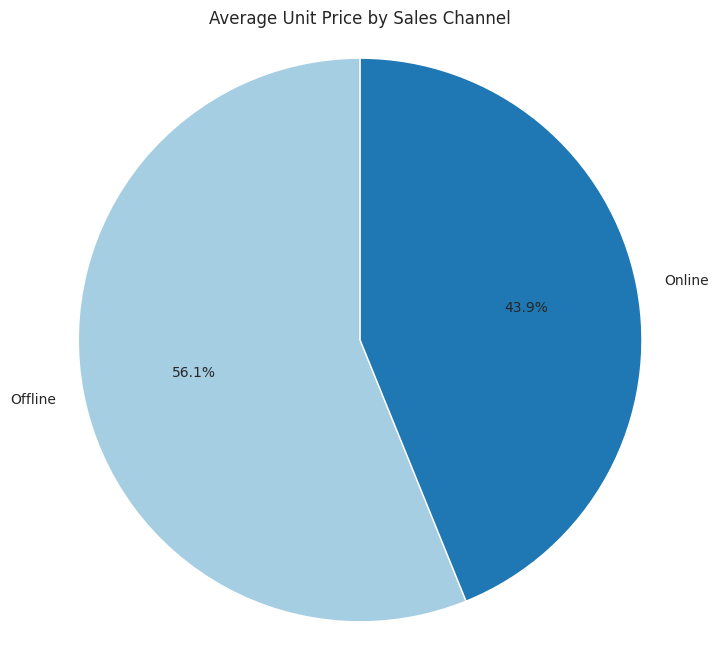

In [37]:
plt.figure(figsize=(8, 8))
plt.pie(highest_avg_price['Unit Price'], labels=highest_avg_price['Sales Channel'],
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Average Unit Price by Sales Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

## **14. Are there any outliers in the Total Cost Distribution?**

In [38]:
q1 = df['Total Cost'].quantile (0.25)
q3 = df['Total Cost'].quantile (0.75)

iqr = q3 - q1

lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

outliers = df[(df['Total Cost'] < lower_fence) | (df['Total Cost'] > upper_fence)].reset_index(drop = True)

outliers

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing Time
0,Central America and the Caribbean,Honduras,Household,Offline,H,2017-02-08,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,5 days
1,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.00,1367272.50,44 days
2,Europe,Lithuania,Office Supplies,Offline,H,2010-10-24,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,24 days


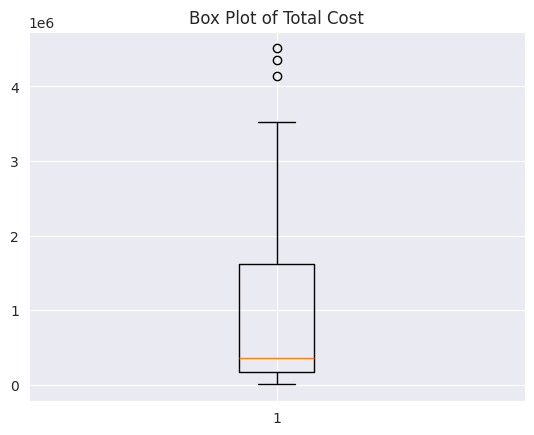

In [39]:
# @title Order ID


plt.boxplot (df['Total Cost'])
plt.title ('Box Plot of Total Cost')
plt.show()

## **15. How does the total profit vary acroos different item types?**

In [40]:
x = df.groupby (df['Item Type']) ['Total Profit'].sum().reset_index (name = 'Total Profit')
x

,Item Type,Total Profit
0,Baby Food,3886643.70
1,Beverages,888047.28
2,Cereal,2292443.43
3,Clothes,5233334.40
4,Cosmetics,14556048.66
5,Fruits,120495.18
6,Household,7412605.71
7,Meat,610610.00
8,Office Supplies,5929583.75
9,Personal Care,1220622.48


## **16. What is the average order processing time for each country?**

In [41]:
avg_time = df.groupby (df['Country']) ['Processing Time'].mean().reset_index()
avg_time

,Country,Processing Time
0,Albania,44 days 00:00:00
1,Angola,4 days 00:00:00
2,Australia,18 days 16:00:00
3,Austria,7 days 00:00:00
4,Azerbaijan,30 days 00:00:00
5,Bangladesh,47 days 00:00:00
6,Belize,44 days 00:00:00
7,Brunei,37 days 00:00:00
8,Bulgaria,26 days 12:00:00
9,Burkina Faso,10 days 00:00:00


## **17. Which region has the highest average total revenue per order?**

In [42]:
df['avg total revenue'] = df['Total Revenue'] / df['Units Sold']
highest_avg_revenue = df.groupby (df['Region']) ['avg total revenue'].mean()
highest_avg_revenue.sort_values (ascending = True)
highest_avg_revenue.head(2)

,avg total revenue
Region,
Asia,335.809091
Australia and Oceania,222.672727


## **18. Is there a relationship between the numbers of units sold & the total profit?**

In [43]:
reln = df['Units Sold'].corr (df['Total Profit'])
print (f"Correlation Coefficient : {reln}")

Correlation Coefficient : 0.5645504620845976


## **19. How does the order priority vary based on the item type?**

In [44]:
order_priority = df.groupby (df['Order Priority']) ['Item Type'].value_counts().reset_index(name = 'No. of Items')
order_priority

,Order Priority,Item Type,No. of Items
0,C,Beverages,7
1,C,Clothes,4
2,C,Office Supplies,2
3,C,Personal Care,2
4,C,Vegetables,2
5,C,Baby Food,1
6,C,Cereal,1
7,C,Cosmetics,1
8,C,Fruits,1
9,C,Household,1
